
1. Take the Fashion MNIST data set and a suitable model architecture. Display the effect of the choice of the activation function, i.e., investigate different learning and generalization behavior if sgd or a modern activation function (e.g. relu, selu, ...) is used. Compare the behavior of at least three different acivation functions.


In [1]:
# importing all the required libraries 

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt







In [2]:
#loading the fashion mnist data set
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Label: 7

 image pixel array 
: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

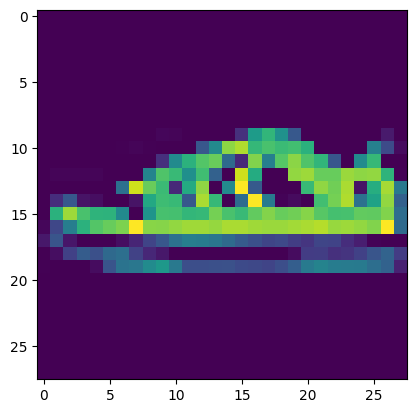

In [3]:
#printing sample label and image at random index
index = 5500

#to determine the way flaoting point number, arrays and other numoy objects are displayed.
np.set_printoptions(linewidth=320)

print(f'Label: {training_labels[index]}')
print(f'\n image pixel array \n: {training_images[index]}')

#visualize the image
plt.imshow(training_images[index])

In [4]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [5]:
#creating function for model architecture
def create_model(activation_function):
  model = Sequential([tf.keras.layers.Conv2D(64, (3,3), activation= activation_function, input_shape=(28, 28, 1)),
                      tf.keras.layers.MaxPooling2D(2, 2),
                      tf.keras.layers.Conv2D(64, (3,3), activation= activation_function),
                      tf.keras.layers.MaxPooling2D(2,2),
                      Flatten(input_shape= (28,28)),
                      Dense(128, activation = activation_function),
                      Dense(10, activation = 'softmax')])

  #model.compile(optimizer = SGD(), loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model



#This code will train and evaluate a simple neural network model for each of the activation functions (ReLU, SELU, and Tanh). 
#It will then plot the training and validation accuracy for each activation function against the number of epochs. 
#You can use the resulting plot to compare the learning and generalization behavior of each activation function.


In [7]:
#Activation functions to compare
activation_functions = ['relu', 'selu', 'tanh']

#Train and evaluate the models with different activation functions
histories = []
for activation_function in activation_functions:
  print(f"Training model with {activation_function} activation function...")
  model = create_model(activation_function)
  history = model.fit(training_images, training_labels, epochs = 10, validation_split = 0.2)
  test_loss , test_accuracy = model.evaluate(test_images, test_labels)
  print(f"Test accuracy: {test_accuracy}")
  histories.append(history)


Training model with relu activation function...
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4649 - accuracy: 0.8316 - val_loss: 0.3433 - val_accuracy: 0.8732
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3107 - accuracy: 0.8861 - val_loss: 0.2946 - val_accuracy: 0.8938
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2629 - accuracy: 0.9032 - val_loss: 0.2745 - val_accuracy: 0.8995
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2310 - accuracy: 0.9150 - val_loss: 0.2450 - val_accuracy: 0.9102
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2063 - accuracy: 0.9230 - val_loss: 0.2505 - val_accuracy: 0.9101
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1829 - accuracy: 0.9305 - val_loss: 0.2523 - val_accuracy: 0.9112
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1641 - acc

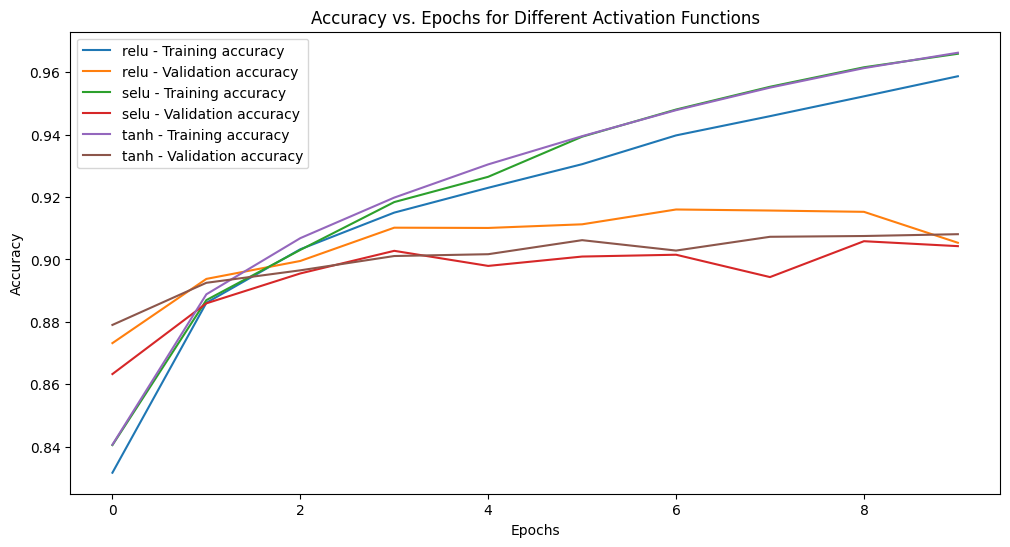

In [8]:
#plot training and validate accuracy
plt.figure(figsize = (12,6))
for i, history in enumerate(histories):
  plt.plot(history.history['accuracy'], label = f"{activation_functions[i]} - Training accuracy")
  plt.plot(history.history['val_accuracy'], label=f"{activation_functions[i]} - Validation accuracy")

plt.title('Accuracy vs. Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
#cross checking prediction
classifications=model.predict(test_images)
print(classifications[1])
print(test_labels[1])

313/313 [==============================] - 1s 2ms/step
[3.2188396e-05 2.4603389e-11 9.9986255e-01 1.1744944e-06 3.9865346e-05 9.2817247e-09 6.3884298e-05 3.2445381e-08 2.6461041e-07 4.7661519e-10]
2


2. Take the same setup and the ADAM optimizer, display the result of the choice of different batch sizes for mini-batch training. Take at least three choices and shortly discuss the differences.

In [11]:
#batch sizes to compare
batch_sizes = [32,64,128]

#train and evaluate the models with different batch sizes
histories_batch = []
for batch_size in batch_sizes:
  print(f"Training model with batch size {batch_size}...")
  model = create_model('relu')
  history = model.fit(training_images, training_labels, batch_size=batch_size, epochs=10, validation_split=0.2)
  test_loss, test_accuracy = model.evaluate(test_images, test_labels)
  print(f"Test accuracy: {test_accuracy}")
  histories_batch.append(history)

#to get summary of the model
model.summary()

Training model with batch size 32...
Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4649 - accuracy: 0.8331 - val_loss: 0.3590 - val_accuracy: 0.8723
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3143 - accuracy: 0.8855 - val_loss: 0.2975 - val_accuracy: 0.8913
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2657 - accuracy: 0.9032 - val_loss: 0.2701 - val_accuracy: 0.9007
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2330 - accuracy: 0.9133 - val_loss: 0.2754 - val_accuracy: 0.8998
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2059 - accuracy: 0.9231 - val_loss: 0.2609 - val_accuracy: 0.9079
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1809 - accuracy: 0.9334 - val_loss: 0.2802 - val_accuracy: 0.9018
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1601 - accuracy: 0.93

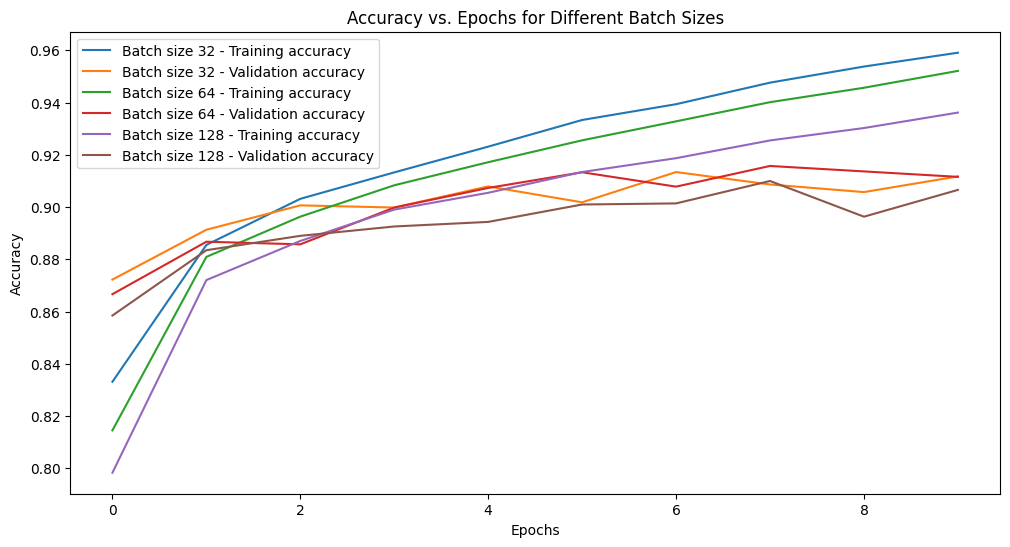

In [12]:
# Plot training and validation accuracy for different batch sizes
plt.figure(figsize=(12, 6))
for i, history in enumerate(histories_batch):
    plt.plot(history.history['accuracy'], label=f"Batch size {batch_sizes[i]} - Training accuracy")
    plt.plot(history.history['val_accuracy'], label=f"Batch size {batch_sizes[i]} - Validation accuracy")

plt.title('Accuracy vs. Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()